In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("predictive_maintenance.csv")  # Update filename if needed
print("Columns in dataset:", data.columns.tolist())  # Verify column names

Columns in dataset: ['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target', 'Failure Type']


In [8]:
# Define numerical columns based on ACTUAL dataset columns
numerical_cols = [
    'Air temperature [K]', 
    'Process temperature [K]',
    'Rotational speed [rpm]', 
    'Torque [Nm]',
    'Tool wear [min]'
]

# Check if columns exist
missing_cols = [col for col in numerical_cols if col not in data.columns]
if missing_cols:
    print("Warning: Missing columns", missing_cols)
else:
    print("All numerical columns present")

All numerical columns present


In [3]:
# Display first 5 rows
print("First 5 Rows:")
display(data.head())

# Check data types and missing values
print("\nData Info:")
data.info()

# Unique values in target columns
print("\nUnique Values in 'Failure Type':")
print(data['Failure Type'].unique())

print("\nUnique Values in 'Target':")
print(data['Target'].unique())

First 5 Rows:


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB

Unique Values in 'Failure Type':
['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']

Unique Values i

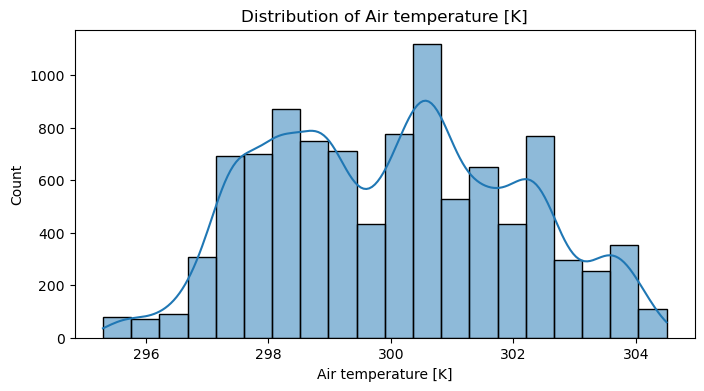

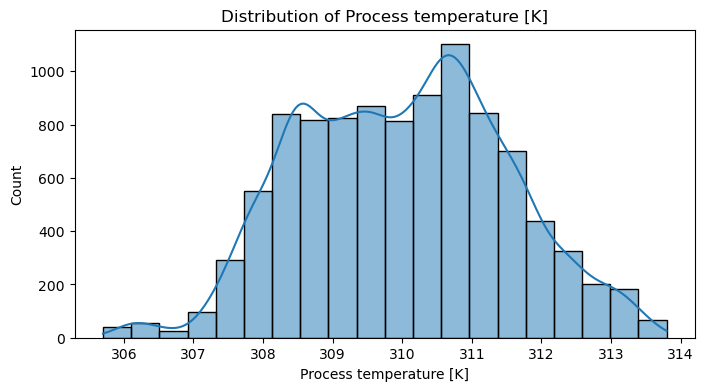

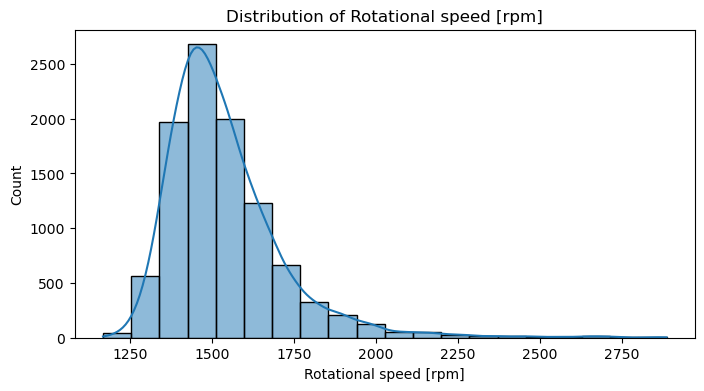

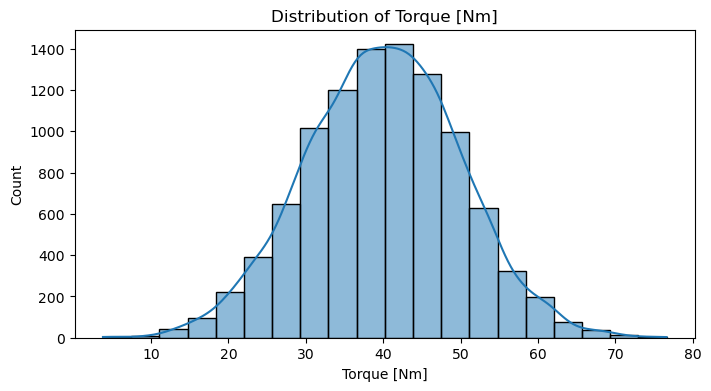

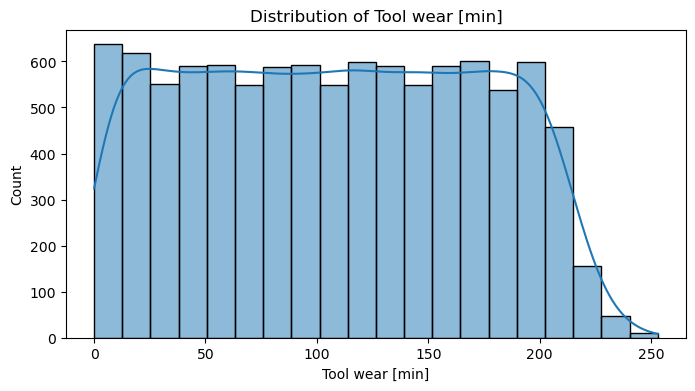

In [9]:
# Plot histograms for each numerical column
for col in numerical_cols:
    if col in data.columns:  # Safety check
        plt.figure(figsize=(8, 4))
        sns.histplot(data[col], bins=20, kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()
    else:
        print(f"Skipping missing column: {col}")

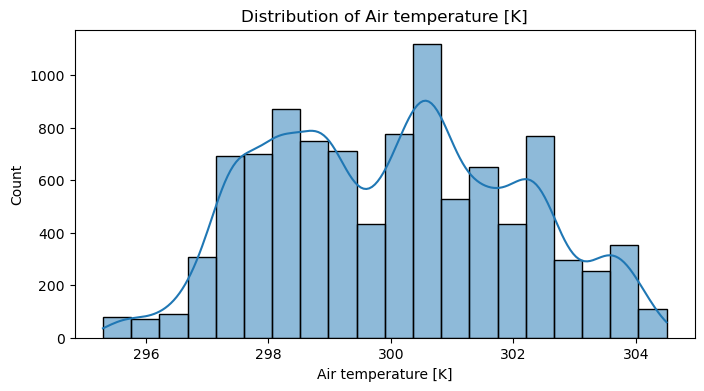

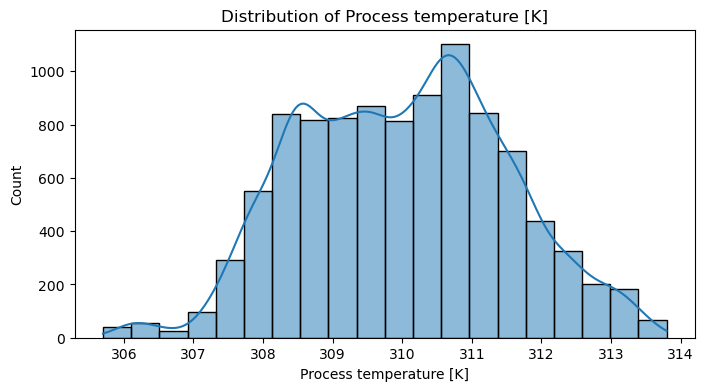

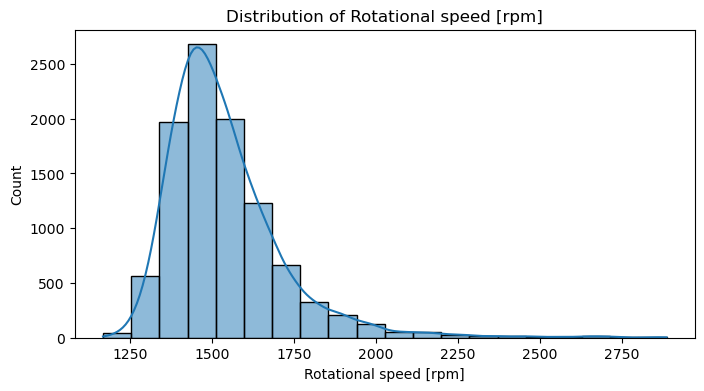

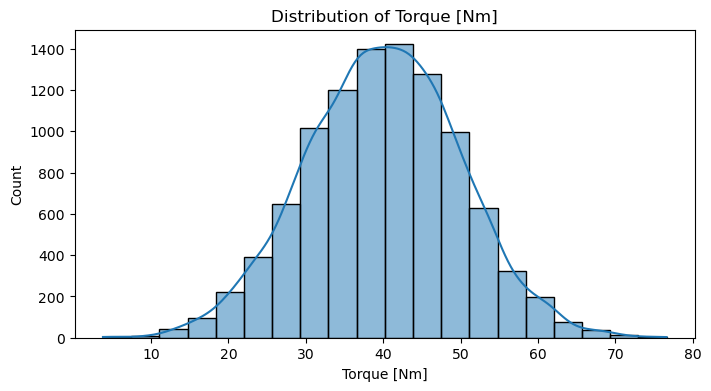

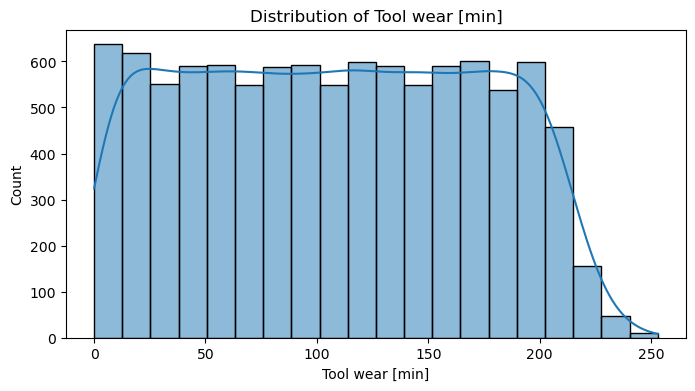

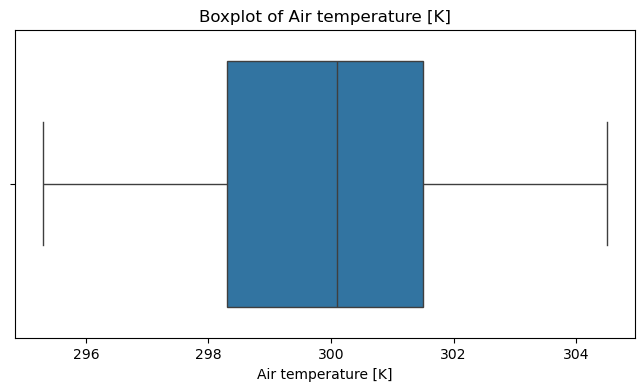

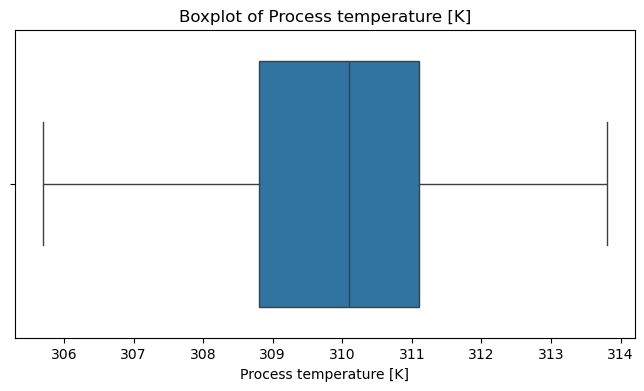

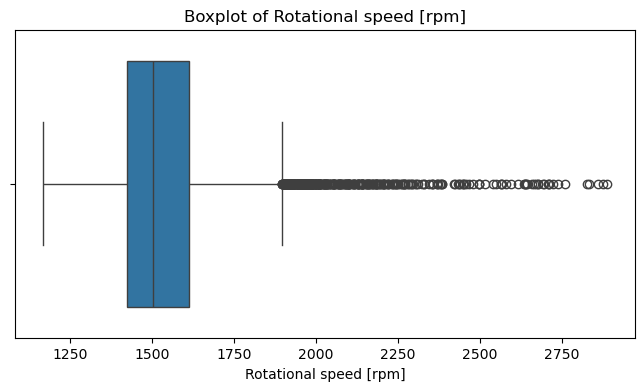

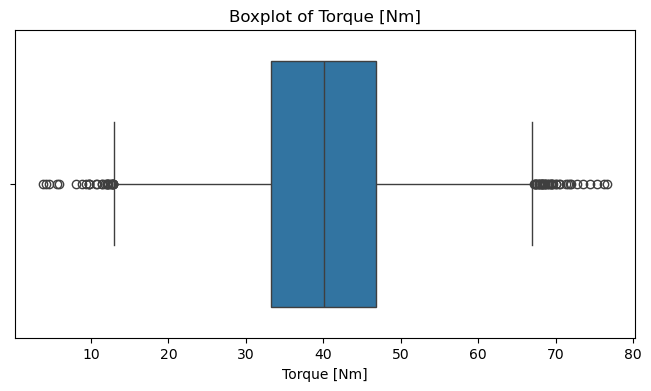

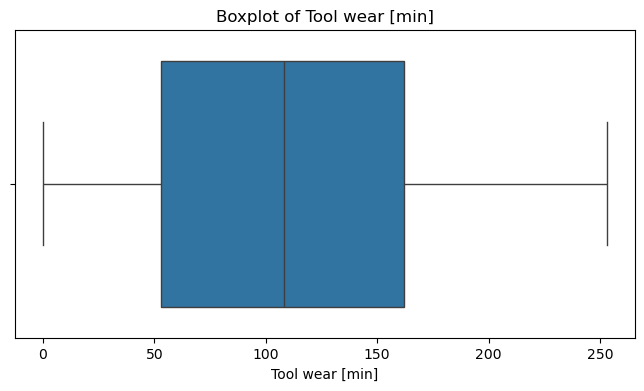

In [11]:
# Histograms for numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Boxplots for numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

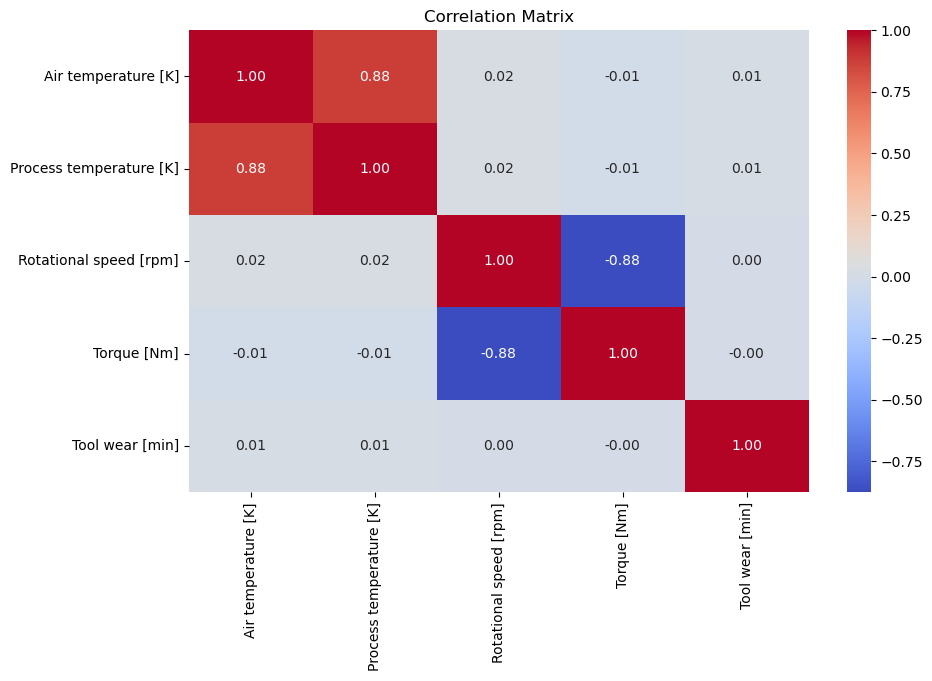

In [12]:
# Calculate correlations
corr_matrix = data[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

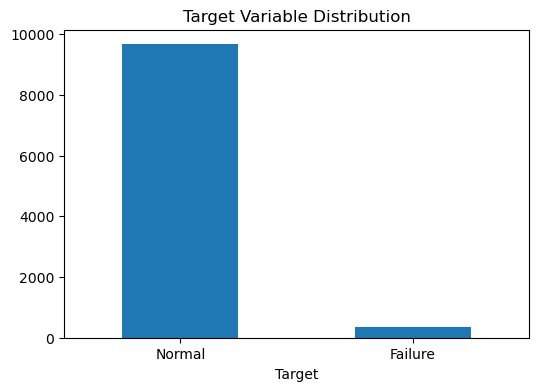

In [13]:
# Check target variable distribution
if 'Target' in data.columns:
    plt.figure(figsize=(6, 4))
    data['Target'].value_counts().plot(kind='bar')
    plt.title("Target Variable Distribution")
    plt.xticks([0, 1], ['Normal', 'Failure'], rotation=0)
    plt.show()
else:
    print("'Target' column not found")

In [9]:
# Save cleaned data
data.to_csv("explored_data_week2.csv", index=False)

# Verify save
try:
    test_load = pd.read_csv("explored_data_week2.csv")
    print("Data successfully saved. Test load shape:", test_load.shape)
except Exception as e:
    print("Save failed:", e)

Data successfully saved. Test load shape: (10000, 10)
